# Correlate_proteomics_flagship_harmonized

This notebook correlates the proteomics from the flaghip and harmonized gbm data. It uses the database_id column instead of gene name. 

In [165]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stat
import scipy.stats
import re
import sys 
import math

import cptac
import cptac.utils as u
import plot_utils as p
import cptac.pancan as pc

import statsmodels.stats.multitest

In [3]:
pc_g = pc.PancanGbm()

In [12]:
gbm = cptac.Gbm()

In [15]:
og_gbm_prot = gbm.get_proteomics()
og_gbm_prot

Name,A1BG,A2M,AAAS,AACS,AADAT,AAED1,AAGAB,AAK1,AAMDC,AAMP,...,ZSCAN31,ZSWIM8,ZW10,ZWILCH,ZWINT,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
Patient_ID,,,,,,,,,,,,,,,,,,,,,
C3L-00104,0.077630,0.487228,-0.254208,-0.144373,0.551881,-0.025276,-0.467451,-0.089511,-0.078806,0.329603,...,NaN,-0.047437,-0.105908,-0.347076,NaN,0.459635,0.079452,-0.784983,-0.488441,0.167990
C3L-00365,-0.145975,0.798796,0.184242,-0.470603,NaN,0.390211,0.245466,-0.609998,0.118625,-0.086927,...,NaN,0.161975,-0.213093,0.235571,NaN,0.107421,0.048724,0.138403,-0.290141,0.405037
C3L-00674,0.821991,1.096470,-0.094421,-0.106304,0.084578,0.176402,-0.248151,0.014061,-0.699773,-0.638462,...,NaN,-0.065534,-0.306717,0.879991,NaN,0.883564,-0.172222,0.011876,-0.131889,-0.503581
C3L-00677,-0.064567,0.129385,0.047751,-0.118187,0.237434,NaN,0.303847,0.322163,-0.555479,-0.363414,...,-0.062127,-0.254535,0.463653,0.580230,0.503044,-0.604986,0.178077,-0.720059,-0.150197,-0.268715
C3L-01040,-0.763691,-1.031834,-0.217194,-0.695701,0.184173,-0.474816,-0.051789,0.344842,-0.642746,0.068863,...,NaN,-0.092502,0.010639,-0.465079,NaN,-0.500083,0.112651,1.004660,-0.230304,-0.102416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PT-RN5K.N,-1.624156,-1.163916,-0.570896,0.608478,0.756814,NaN,0.136388,1.792089,-0.047550,0.595335,...,NaN,0.298664,-0.403930,-0.482597,0.240966,NaN,0.609314,-1.293464,0.225910,-0.013637
PT-RU72.N,-1.452245,-1.147384,-0.373231,0.584371,NaN,-1.670928,-0.074499,1.893627,-0.369483,0.244199,...,NaN,0.155988,0.002551,-0.834434,NaN,-0.073908,0.637394,-0.795886,0.326046,-0.217014
PT-UTHO.N,-1.902994,-1.162469,-0.411892,0.534934,NaN,0.598046,-0.382636,1.997332,-0.134316,0.500731,...,NaN,0.016857,-0.171858,-0.462233,NaN,1.278683,0.616285,-0.734952,0.339283,-0.419138


In [16]:
gbm_prot = pc_g.get_proteomics()
gbm_prot

Name                     ARF5              M6PR             ESRRA  \
Database_ID ENSP00000000233.5 ENSP00000000412.3 ENSP00000000442.6   
Patient_ID                                                          
C3L-00104           -0.254733         -0.138938          0.662227   
C3L-00365           -0.138512         -0.824520          0.494419   
C3L-00674           -0.351464         -0.120197         -0.084371   
C3L-00677           -0.062869          0.094198          0.391070   
C3L-01040           -0.365351          0.070523         -0.472543   
...                       ...               ...               ...   
PT-RN5K.N            0.582456         -0.356730          0.236333   
PT-RU72.N            0.522376          0.226891         -1.059051   
PT-UTHO.N            0.595553          0.194616         -0.045162   
PT-WVLH.N            0.958226         -0.057340               NaN   
PT-Y8DK.N            0.614902          0.031155          0.201446   

Name                    FKBP4           NDUFAF7             FUCA2  \
Database_ID ENSP00000001008.4 ENSP00000002125.4 ENSP00000002165.5   
Patient_ID                                                          
C3L-00104           -0.074868          0.213529          0.123398   
C3L-00365            0.043783         -0.001394          0.101477   
C3L-00674           -0.260275          0.096193         -0.360274   
C3L-00677           -0.030638          0.742258         -0.417291   
C3L-01040           -0.255288          0.096844          0.356271   
...                       ...               ...               ...   
PT-RN5K.N            0.658617          0.719931         -0.760723   
PT-RU72.N            0.558740          0.893739         -0.383723   
PT-UTHO.N            0.546508          0.810285         -0.868148   
PT-WVLH.N            0.635282          1.143518         -1.243729   
PT-Y8DK.N            0.488837          0.963876         -1.368573   

Name                   DBNDD1            HS3ST1           CYP51A1  \
Database_ID ENSP00000002501.6 ENSP00000002596.5 ENSP00000003100.8   
Patient_ID                                                          
C3L-00104            2.105458               NaN         -0.660264   
C3L-00365           -0.287232               NaN         -0.402679   
C3L-00674            0.227499          1.217058         -0.165751   
C3L-00677           -0.013377               NaN         -0.176649   
C3L-01040            1.182940               NaN         -0.307430   
...                       ...               ...               ...   
PT-RN5K.N            1.562912               NaN         -1.158580   
PT-RU72.N            1.652233               NaN         -0.649935   
PT-UTHO.N            0.721085               NaN         -0.840286   
PT-WVLH.N                 NaN               NaN         -0.185783   
PT-Y8DK.N            0.002088         -0.020131         -0.719916   

Name                    USP28  ...             ETNK1             AP1S2  \
Database_ID ENSP00000003302.4  ... ENSP00000500633.1 ENSP00000500695.1   
Patient_ID                     ...                                       
C3L-00104                 NaN  ...         -0.047874         -0.446007   
C3L-00365            0.059975  ...          0.350165         -0.844985   
C3L-00674            0.010124  ...         -0.167319         -0.096328   
C3L-00677            0.535304  ...          0.179200          0.320945   
C3L-01040                 NaN  ...          0.098253         -0.298907   
...                       ...  ...               ...               ...   
PT-RN5K.N           -0.247034  ...         -0.183210         -0.723977   
PT-RU72.N           -0.504037  ...          0.237765         -0.559902   
PT-UTHO.N           -0.267181  ...          0.018208          0.813018   
PT-WVLH.N           -0.402786  ...          0.151603          0.380411   
PT-Y8DK.N           -0.509412  ...          0.081186          0.901674   

Name                      EED             DDHD1               

We don't want to correlate based off of gene name because there are sometimes multiple isoforms 
For example, different WIZ proteomics columns in the same cancer type don't even correlate very well 

In [94]:
#download harmonized proteomics and get only wiz columns
gbm_prot = pc_g.get_proteomics()
import cptac.utils as u
wiz = gbm_prot[["WIZ"]]
wiz = u.reduce_multiindex(wiz ,levels_to_drop = 0)# drop wiz so column names are isoforms
wiz

Database_ID,ENSP00000500993.1,ENSP00000501256.3,ENSP00000501300.1
Patient_ID,,,
C3L-00104,0.129282,-0.073448,-0.029020
C3L-00365,0.078407,1.806950,0.033808
C3L-00674,0.177530,0.065973,-0.126149
C3L-00677,0.049948,1.964570,0.161229
C3L-01040,0.110757,0.030719,0.066426
...,...,...,...
PT-RN5K.N,-0.753209,NaN,-0.530017
PT-RU72.N,-0.706170,-1.889779,-0.492358
PT-UTHO.N,-0.600093,-0.095237,-0.286616


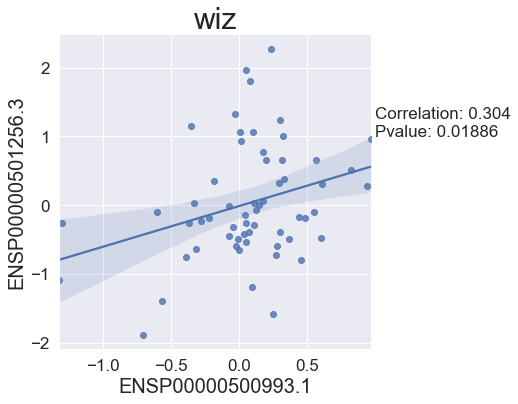

In [95]:
p.plot_pearson(wiz,"ENSP00000500993.1","ENSP00000501256.3" , "none", title = "wiz", ra_stats = True, show_plot = True)


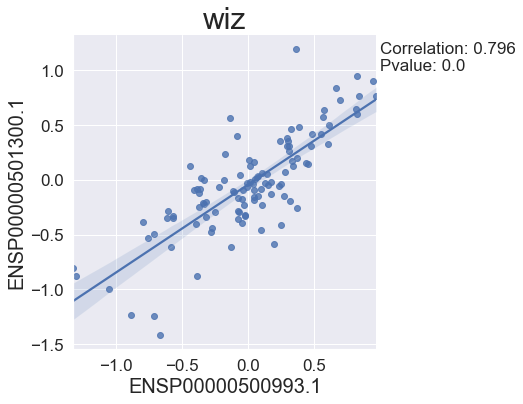

In [10]:
p.plot_pearson(wiz,"ENSP00000500993.1","ENSP00000501300.1" , "none", title = "wiz", ra_stats = True, show_plot = True)


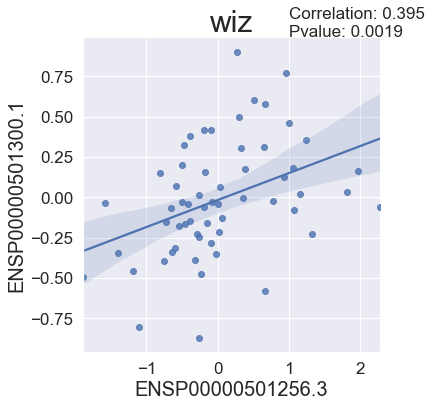

In [11]:
p.plot_pearson(wiz,"ENSP00000501256.3","ENSP00000501300.1" , "none", title = "wiz", ra_stats = True, show_plot = True)


Based on these results, it will be best to correlate proteomics from flagship papers and harmonized data based on the gene id column. However, the current flagship gbm data in the cptac package doesn't have the the gene id column. So I will download the raw gbm data from box and then convert the ref seq id to the ensemble gene id which is in the pancan data. 


In [113]:
#read in raw flagship gbm data
gbm_raw =pd.read_csv("~/Downloads/proteome_mssm_per_gene_clean.v3.0.20191121.tsv",sep = "\t") 
gbm_raw = gbm_raw.rename(columns={
         "gene":"Name"})
gbm_raw

,Name,refseq_id,C3L-00104,C3L-00365,C3L-00674,C3L-00677,C3L-01040,C3L-01043,C3L-01045,C3L-01046,...,PT-NPJ7,PT-P44H,PT-Q2AG,PT-QVJO,PT-R55F,PT-RN5K,PT-RU72,PT-UTHO,PT-WVLH,PT-Y8DK
0,A1BG,NP_570602.2,0.077630,-0.145975,0.821991,-0.064567,-0.763691,1.094879,-0.027903,-0.375754,...,-1.717510,-1.357500,-1.528595,-1.539841,-1.789458,-1.624156,-1.452245,-1.902994,-2.003926,-1.590282
1,A2M,NP_000005.2,0.487228,0.798796,1.096470,0.129385,-1.031834,0.769231,-0.735991,-0.037553,...,-1.064325,-0.806817,-1.511272,-1.247939,-1.478376,-1.163916,-1.147384,-1.162469,-1.605927,-1.227305
2,AAAS,NP_056480.1,-0.254208,0.184242,-0.094421,0.047751,-0.217194,-0.011039,0.125775,0.239725,...,-0.306516,-0.580316,-0.710189,-0.672322,-0.764798,-0.570896,-0.373231,-0.411892,-0.694845,-0.487413
3,AACS,NP_076417.2,-0.144373,-0.470603,-0.106304,-0.118187,-0.695701,-0.152467,-0.285444,0.152238,...,0.436075,0.556105,0.888602,0.916637,0.857309,0.608478,0.584371,0.534934,0.817702,0.866017
4,AADAT,NP_001273611.1,0.551881,NaN,0.084578,0.237434,0.184173,-0.457411,-0.620125,-0.505107,...,1.316010,1.429100,1.337539,1.630508,1.157699,0.756814,NaN,NaN,0.644152,1.033949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11136,ZXDC,NP_079388.3,0.459635,0.107421,0.883564,-0.604986,-0.500083,0.835224,-0.230124,-0.543543,...,0.164100,0.517515,NaN,-1.330917,0.080553,NaN,-0.073908,1.278683,-0.233022,-0.250798
11137,ZYG11B,NP_078922.1,0.079452,0.048724,-0.172222,0.178077,0.112651,-0.271005,-0.047399,0.118416,...,0.767921,0.379683,0.791386,0.667393,0.563370,0.609314,0.637394,0.616285,0.732273,0.623839
11138,ZYX,NP_001010972.1,-0.784983,0.138403,0.011876,-0.720059,1.004660,0.371339,0.761362,0.963697,...,-1.128100,-1.087567,-0.667928,-1.172195,-0.973314,-1.293464,-0.795886,-0.734952,-1.158899,-0.892930
11139,ZZEF1,NP_055928.3,-0.488441,-0.290141,-0.131889,-0.150197,-0.230304,-0.168640,-0.376203,0.243561,...,0.209480,0.210812,0.053734,0.303740,0.478914,0.225910,0.326046,0.339283,0.354608,0.249729


In [114]:
# get list of refseq ids in original data
gbmrefseq_id = gbm_raw.refseq_id.tolist()

In [115]:
#read in ref seq file to ensembl id downloaded from:
#https://ftp.ncbi.nih.gov/gene/DATA/
#subset large gene2ensembl file to only refseq ids in flagship gbm data set
gene2ensembl = pd.read_csv("~/Downloads/gene2ensembl",sep = "\t")
gbm_mapfile = gene2ensembl[gene2ensembl['protein_accession.version'].isin(gbmrefseq_id)]
#Rename and only get refseq_id and Database_Id columns
gbm_mapfile = gbm_mapfile[["protein_accession.version","Ensembl_protein_identifier"]]
gbm_mapfile = gbm_mapfile.rename(columns={
         "protein_accession.version":"refseq_id","Ensembl_protein_identifier":"Database_ID"})
gbm_mapfile


,refseq_id,Database_ID
1140618,NP_570602.2,ENSP00000263100.2
1140624,NP_001153647.1,ENSP00000443194.1
1140626,NP_001076.2,ENSP00000376793.3
1140629,NP_001289474.1,ENSP00000403343.1
1140632,NP_001596.2,ENSP00000261772.8
...,...,...
1204750,NP_001335641.1,ENSP00000484277.1
1204807,NP_001290356.1,ENSP00000439913.1
1204818,NP_115707.2,ENSP00000314295.5
1204820,NP_001340422.1,ENSP00000475224.1


In [116]:
gbm_raw = gbm_raw.set_index("refseq_id")
gbm_mapfile = gbm_mapfile.set_index("refseq_id")
gbm_raw_ensbl= gbm_raw.join(gbm_mapfile,how = "inner")
gbm_raw_ensbl


,Name,C3L-00104,C3L-00365,C3L-00674,C3L-00677,C3L-01040,C3L-01043,C3L-01045,C3L-01046,C3L-01048,...,PT-P44H,PT-Q2AG,PT-QVJO,PT-R55F,PT-RN5K,PT-RU72,PT-UTHO,PT-WVLH,PT-Y8DK,Database_ID
refseq_id,,,,,,,,,,,,,,,,,,,,,
NP_570602.2,A1BG,0.077630,-0.145975,0.821991,-0.064567,-0.763691,1.094879,-0.027903,-0.375754,-0.394736,...,-1.357500,-1.528595,-1.539841,-1.789458,-1.624156,-1.452245,-1.902994,-2.003926,-1.590282,ENSP00000263100.2
NP_056480.1,AAAS,-0.254208,0.184242,-0.094421,0.047751,-0.217194,-0.011039,0.125775,0.239725,0.208129,...,-0.580316,-0.710189,-0.672322,-0.764798,-0.570896,-0.373231,-0.411892,-0.694845,-0.487413,ENSP00000209873.4
NP_076417.2,AACS,-0.144373,-0.470603,-0.106304,-0.118187,-0.695701,-0.152467,-0.285444,0.152238,-0.032829,...,0.556105,0.888602,0.916637,0.857309,0.608478,0.584371,0.534934,0.817702,0.866017,ENSP00000324842.6
NP_001273611.1,AADAT,0.551881,NaN,0.084578,0.237434,0.184173,-0.457411,-0.620125,-0.505107,-0.290143,...,1.429100,1.337539,1.630508,1.157699,0.756814,NaN,NaN,0.644152,1.033949,ENSP00000423190.1
NP_714542.1,AAED1,-0.025276,0.390211,0.176402,NaN,-0.474816,0.679201,NaN,NaN,0.077408,...,-1.754669,-0.171882,-1.177172,-1.080191,NaN,-1.670928,0.598046,-0.336013,-0.355792,ENSP00000364382.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NP_008988.2,ZWINT,NaN,NaN,NaN,0.503044,NaN,NaN,-0.287100,-0.295464,NaN,...,NaN,NaN,NaN,NaN,0.240966,NaN,NaN,-0.709850,1.778184,ENSP00000363055.3
NP_079388.3,ZXDC,0.459635,0.107421,0.883564,-0.604986,-0.500083,0.835224,-0.230124,-0.543543,0.306163,...,0.517515,NaN,-1.330917,0.080553,NaN,-0.073908,1.278683,-0.233022,-0.250798,ENSP00000374359.3
NP_078922.1,ZYG11B,0.079452,0.048724,-0.172222,0.178077,0.112651,-0.271005,-0.047399,0.118416,-0.172134,...,0.379683,0.791386,0.667393,0.563370,0.609314,0.637394,0.616285,0.732273,0.623839,ENSP00000294353.6


In [117]:
gbm_raw_ensbl = gbm_raw_ensbl.reset_index()
gbm_raw_ensbl = gbm_raw_ensbl.drop(columns=['refseq_id'])
gbm_raw_ensbl =gbm_raw_ensbl.set_index(["Name","Database_ID"])
gbm_raw_ensbl

,,C3L-00104,C3L-00365,C3L-00674,C3L-00677,C3L-01040,C3L-01043,C3L-01045,C3L-01046,C3L-01048,C3L-01049,...,PT-NPJ7,PT-P44H,PT-Q2AG,PT-QVJO,PT-R55F,PT-RN5K,PT-RU72,PT-UTHO,PT-WVLH,PT-Y8DK
Name,Database_ID,,,,,,,,,,,,,,,,,,,,,
A1BG,ENSP00000263100.2,0.077630,-0.145975,0.821991,-0.064567,-0.763691,1.094879,-0.027903,-0.375754,-0.394736,-0.025968,...,-1.717510,-1.357500,-1.528595,-1.539841,-1.789458,-1.624156,-1.452245,-1.902994,-2.003926,-1.590282
AAAS,ENSP00000209873.4,-0.254208,0.184242,-0.094421,0.047751,-0.217194,-0.011039,0.125775,0.239725,0.208129,0.087263,...,-0.306516,-0.580316,-0.710189,-0.672322,-0.764798,-0.570896,-0.373231,-0.411892,-0.694845,-0.487413
AACS,ENSP00000324842.6,-0.144373,-0.470603,-0.106304,-0.118187,-0.695701,-0.152467,-0.285444,0.152238,-0.032829,-0.163304,...,0.436075,0.556105,0.888602,0.916637,0.857309,0.608478,0.584371,0.534934,0.817702,0.866017
AADAT,ENSP00000423190.1,0.551881,NaN,0.084578,0.237434,0.184173,-0.457411,-0.620125,-0.505107,-0.290143,NaN,...,1.316010,1.429100,1.337539,1.630508,1.157699,0.756814,NaN,NaN,0.644152,1.033949
AAED1,ENSP00000364382.3,-0.025276,0.390211,0.176402,NaN,-0.474816,0.679201,NaN,NaN,0.077408,-0.009380,...,-1.190428,-1.754669,-0.171882,-1.177172,-1.080191,NaN,-1.670928,0.598046,-0.336013,-0.355792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZWINT,ENSP00000363055.3,NaN,NaN,NaN,0.503044,NaN,NaN,-0.287100,-0.295464,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.240966,NaN,NaN,-0.709850,1.778184
ZXDC,ENSP00000374359.3,0.459635,0.107421,0.883564,-0.604986,-0.500083,0.835224,-0.230124,-0.543543,0.306163,0.199433,...,0.164100,0.517515,NaN,-1.330917,0.080553,NaN,-0.073908,1.278683,-0.233022,-0.250798
ZYG11B,ENSP00000294353.6,0.079452,0.048724,-0.172222,0.178077,0.112651,-0.271005,-0.047399,0.118416,-0.172134,-0.340400,...,0.767921,0.379683,0.791386,0.667393,0.563370,0.609314,0.637394,0.616285,0.732273,0.623839


In [118]:
gbm_raw_ensbl = gbm_raw_ensbl.T
gbm_raw_ensbl

Name,A1BG,AAAS,AACS,AADAT,AAED1,AAGAB,AAMDC,AAMP,AAR2,AARS,...,ZSCAN26,ZSCAN30,ZSCAN31,ZW10,ZWILCH,ZWINT,ZXDC,ZYG11B,ZZEF1,ZZZ3
Database_ID,ENSP00000263100.2,ENSP00000209873.4,ENSP00000324842.6,ENSP00000423190.1,ENSP00000364382.3,ENSP00000261880.5,ENSP00000307254.8,ENSP00000403343.1,ENSP00000313674.4,ENSP00000261772.8,...,ENSP00000481707.1,ENSP00000329738.4,ENSP00000390076.1,ENSP00000200135.3,ENSP00000311429.5,ENSP00000363055.3,ENSP00000374359.3,ENSP00000294353.6,ENSP00000371051.2,ENSP00000359837.3
C3L-00104,0.077630,-0.254208,-0.144373,0.551881,-0.025276,-0.467451,-0.078806,0.329603,-0.264836,-0.317980,...,-0.069880,0.065235,NaN,-0.105908,-0.347076,NaN,0.459635,0.079452,-0.488441,0.167990
C3L-00365,-0.145975,0.184242,-0.470603,NaN,0.390211,0.245466,0.118625,-0.086927,0.384629,0.134317,...,0.549577,0.129612,NaN,-0.213093,0.235571,NaN,0.107421,0.048724,-0.290141,0.405037
C3L-00674,0.821991,-0.094421,-0.106304,0.084578,0.176402,-0.248151,-0.699773,-0.638462,0.592874,-0.366866,...,-1.430641,-0.105264,NaN,-0.306717,0.879991,NaN,0.883564,-0.172222,-0.131889,-0.503581
C3L-00677,-0.064567,0.047751,-0.118187,0.237434,NaN,0.303847,-0.555479,-0.363414,0.364775,0.594534,...,-0.219188,-0.096156,-0.062127,0.463653,0.580230,0.503044,-0.604986,0.178077,-0.150197,-0.268715
C3L-01040,-0.763691,-0.217194,-0.695701,0.184173,-0.474816,-0.051789,-0.642746,0.068863,0.346970,-0.324795,...,-0.121456,0.376965,NaN,0.010639,-0.465079,NaN,-0.500083,0.112651,-0.230304,-0.102416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PT-RN5K,-1.624156,-0.570896,0.608478,0.756814,NaN,0.136388,-0.047550,0.595335,-0.817122,0.483823,...,0.116122,-0.046296,NaN,-0.403930,-0.482597,0.240966,NaN,0.609314,0.225910,-0.013637
PT-RU72,-1.452245,-0.373231,0.584371,NaN,-1.670928,-0.074499,-0.369483,0.244199,-0.774499,0.412821,...,-0.353323,NaN,NaN,0.002551,-0.834434,NaN,-0.073908,0.637394,0.326046,-0.217014
PT-UTHO,-1.902994,-0.411892,0.534934,NaN,0.598046,-0.382636,-0.134316,0.500731,-0.943885,0.549517,...,-0.516648,0.075607,NaN,-0.171858,-0.462233,NaN,1.278683,0.616285,0.339283,-0.419138


In [145]:
gbm_raw_ensbl
gbm_raw_ensbl.index.name = "Patient_ID"

In [124]:
gbm_prot_pc = pc_g.get_proteomics()
gbm_prot_pc.index = gbm_prot_pc.index.str.replace(r".N", "", regex=True)# Normal samples labeled with .N
gbm_prot_pc

Name                     ARF5              M6PR             ESRRA  \
Database_ID ENSP00000000233.5 ENSP00000000412.3 ENSP00000000442.6   
Patient_ID                                                          
C3L-00104           -0.254733         -0.138938          0.662227   
C3L-00365           -0.138512         -0.824520          0.494419   
C3L-00674           -0.351464         -0.120197         -0.084371   
C3L-00677           -0.062869          0.094198          0.391070   
C3L-01040           -0.365351          0.070523         -0.472543   
...                       ...               ...               ...   
PT-5K                0.582456         -0.356730          0.236333   
PT-RU72              0.522376          0.226891         -1.059051   
PT-UTHO              0.595553          0.194616         -0.045162   
PT-WVLH              0.958226         -0.057340               NaN   
PT-Y8DK              0.614902          0.031155          0.201446   

Name                    FKBP4           NDUFAF7             FUCA2  \
Database_ID ENSP00000001008.4 ENSP00000002125.4 ENSP00000002165.5   
Patient_ID                                                          
C3L-00104           -0.074868          0.213529          0.123398   
C3L-00365            0.043783         -0.001394          0.101477   
C3L-00674           -0.260275          0.096193         -0.360274   
C3L-00677           -0.030638          0.742258         -0.417291   
C3L-01040           -0.255288          0.096844          0.356271   
...                       ...               ...               ...   
PT-5K                0.658617          0.719931         -0.760723   
PT-RU72              0.558740          0.893739         -0.383723   
PT-UTHO              0.546508          0.810285         -0.868148   
PT-WVLH              0.635282          1.143518         -1.243729   
PT-Y8DK              0.488837          0.963876         -1.368573   

Name                   DBNDD1            HS3ST1           CYP51A1  \
Database_ID ENSP00000002501.6 ENSP00000002596.5 ENSP00000003100.8   
Patient_ID                                                          
C3L-00104            2.105458               NaN         -0.660264   
C3L-00365           -0.287232               NaN         -0.402679   
C3L-00674            0.227499          1.217058         -0.165751   
C3L-00677           -0.013377               NaN         -0.176649   
C3L-01040            1.182940               NaN         -0.307430   
...                       ...               ...               ...   
PT-5K                1.562912               NaN         -1.158580   
PT-RU72              1.652233               NaN         -0.649935   
PT-UTHO              0.721085               NaN         -0.840286   
PT-WVLH                   NaN               NaN         -0.185783   
PT-Y8DK              0.002088         -0.020131         -0.719916   

Name                    USP28  ...             ETNK1             AP1S2  \
Database_ID ENSP00000003302.4  ... ENSP00000500633.1 ENSP00000500695.1   
Patient_ID                     ...                                       
C3L-00104                 NaN  ...         -0.047874         -0.446007   
C3L-00365            0.059975  ...          0.350165         -0.844985   
C3L-00674            0.010124  ...         -0.167319         -0.096328   
C3L-00677            0.535304  ...          0.179200          0.320945   
C3L-01040                 NaN  ...          0.098253         -0.298907   
...                       ...  ...               ...               ...   
PT-5K               -0.247034  ...         -0.183210         -0.723977   
PT-RU72             -0.504037  ...          0.237765         -0.559902   
PT-UTHO             -0.267181  ...          0.018208          0.813018   
PT-WVLH             -0.402786  ...          0.151603          0.380411   
PT-Y8DK             -0.509412  ...          0.081186          0.901674   

Name                      EED             DDHD1               

In [161]:
def wrap_pearson_corr(df_og,df_harmonized, alpha=.05,comparison_columns=None,correction_method='bonferroni',return_all = True, return_corrected_pvals = False):

    
    '''Store comparisons,p-values, correlation in their own array'''
    comparisons = []
    pvals = []
    correlation=[]
    
    
    import cptac.utils as u
    df_og = u.reduce_multiindex(df_og ,levels_to_drop = 0)# drop gene names so column names are isoforms
    df_harmonized = u.reduce_multiindex(df_harmonized ,levels_to_drop = 0)# drop gene names so column names are isoforms
    og_database_ids = df_og.columns.tolist()
    '''Format results in a pandas dataframe'''
    
    newdf = pd.DataFrame()
    for gene in og_database_ids:
        if gene in df_harmonized.columns.tolist():
            #create subset df with gene isoform from each pipeline
            df_subset_og = df_og[[gene]]
            df_subset_pc = df_harmonized[[gene]]
            df_subset = pd.merge(df_subset_og, df_subset_pc, on='Patient_ID')
            #do a linear regression to see if it's a meaningful association
            #dropna will remove rows with nan
            df_subset = df_subset.dropna(axis=0, how="any")
            count_row = df_subset.shape[0]
            if count_row > 30:
                x1 = df_subset[[gene + "_x"]].values
                y1 = df_subset[[gene + "_y"]].values
                x1 = x1[:,0]
                y1 = y1[:,0]
                corr, pval = scipy.stats.pearsonr(x1,y1)

                comparisons.append(gene)
                pvals.append(pval)
                correlation.append(corr)


    '''Correct for multiple testing to determine if each comparison meets the new cutoff'''
    results = statsmodels.stats.multitest.multipletests(pvals=pvals, alpha=alpha, method=correction_method)
    reject = results[0]
    corrected_pval = results[1]

    if return_all:
        if return_corrected_pvals:
            for i in range(0,len(comparisons)):
                newdf = newdf.append({'Comparison': comparisons[i],"Correlation": correlation[i], "P_value": corrected_pval[i]}, ignore_index=True)
                  
        if return_corrected_pvals == False:
            for i in range(0,len(comparisons)):
                newdf = newdf.append({'Comparison': comparisons[i],"Correlation": correlation[i],'P_value': pvals[i]}, ignore_index=True)

    '''Else only add significant comparisons'''
    if (return_all == False):
        
        if return_corrected_pvals:
            for i in range(0, len(reject)):
                if reject[i]:
                    newdf = newdf.append({'Comparison': comparisons[i],"Correlation": correlation[i],"P_value": corrected_pval[i]}, ignore_index=True)
        if return_corrected_pvals == False:
                for i in range(0, len(reject)):
                    if reject[i]:
                        newdf = newdf.append({'Comparison': comparisons[i],"Correlation": correlation[i],"P_value": pvals[i]}, ignore_index=True)
    
    
    newdf = newdf.sort_values(by= 'P_value', ascending=True)
    '''If results df is not empty, return it, else return None'''
    return newdf

In [177]:
corr_df = wrap_pearson_corr(gbm_raw_ensbl,gbm_prot_pc)

In [178]:
corr_df

,Comparison,Correlation,P_value
3931,ENSP00000255882.6,0.990332,7.098736e-49
5486,ENSP00000365534.4,0.987558,7.053362e-46
5206,ENSP00000349259.4,0.987404,9.873666e-46
4030,ENSP00000377061.2,0.987374,1.053051e-45
1561,ENSP00000357535.3,0.987320,1.182955e-45
...,...,...,...
5954,ENSP00000301962.5,-0.049618,7.673581e-01
3544,ENSP00000264230.4,0.034775,8.105231e-01
4594,ENSP00000354571.3,-0.032025,8.270818e-01
234,ENSP00000267339.2,0.014764,9.260641e-01


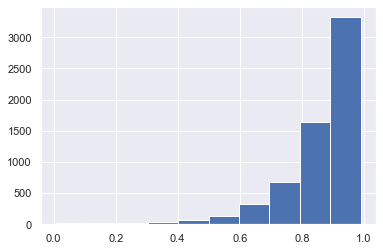

In [180]:
corr_df.Correlation.abs().hist()

In [194]:
low_corr = corr_df.loc[(corr_df["Correlation"] <= 0.5)]
print("Number of flagship harmonized correlations with low correlations")
len(low_corr)

Number of flagship harmonized correlations with low correlations


173

In [185]:
not_sig = corr_df.loc[(corr_df["P_value"] >= 0.05)]
print("Number of flagship harmonized correlations not significant")
len(not_sig)

Number of flagship harmonized correlations not significant


48

In [192]:
# Example bad correlation gene:"PTPN4"
df_og = u.reduce_multiindex(gbm_raw_ensbl ,levels_to_drop = 0)# drop gene names so column names are isoforms
df_harmonized = u.reduce_multiindex(gbm_prot_pc ,levels_to_drop = 0)# drop gene names so column names are isoforms    
df_subset_og = df_og[["ENSP00000263708.2"]]
df_subset_pc = df_harmonized[["ENSP00000263708.2"]]
df_subset = pd.merge(df_subset_og, df_subset_pc, on='Patient_ID')
df_subset = df_subset.rename(columns={
         "ENSP00000263708.2_x":"ENSP00000263708.2_flag","ENSP00000263708.2_y":"ENSP00000263708.2_harm"})
df_subset.head()

Database_ID,ENSP00000263708.2_flag,ENSP00000263708.2_harm
Patient_ID,,
C3L-00104,0.165937,-0.031169
C3L-00365,-0.062658,-0.160986
C3L-00674,-0.120205,-0.542522
C3L-00677,NaN,-1.084097
C3L-01040,-0.121923,-0.287618


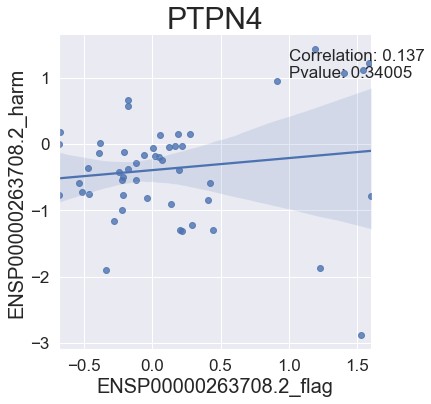

In [193]:
p.plot_pearson(df_subset,"ENSP00000263708.2_flag","ENSP00000263708.2_harm" , "none", title = "PTPN4", ra_stats = True, show_plot = True)
